# Random Variables in Python

Import basic libraries needed, namely numpy (array manipulation, etc.), scipy (random numbers, etc.) and matplotlib.pyplot (plotting).

In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

Basic example: generate binomial random variable Bin(1000,1/2). Good programming practice is to declare the parameters first so that you can change them if needed in one single place.

In [2]:
n=1000
p=1/2

In [3]:
sp.binom.rvs(n, p)

495

Obviously, the number is random and it may change in the following run. Meaning other instances of the code may get different answer. For reproducibility, one can fix the number generator to give the same (but random) result by specifying a seed (initial setup of the random number generator).

In [4]:
sp.binom.rvs(n, p, random_state = 12345)

529

This gives 529 in all implementations. Next, generate 1,000,000 such random variables. For illustration, we measure the time required to do so.

In [37]:
simulations = 1000000
import time
start = time.time()
a = sp.binom.rvs(n, p, size = simulations, random_state = 12345)
end = time.time()
print (end - start)

0.13271117210388184


In [10]:
a

array([529, 502, 507, ..., 518, 525, 520])

Basic statistics: average, max, min.

In [38]:
np.mean(a)

499.996355

In [39]:
np.min(a)

417

In [88]:
np.max(a)

574

Question: What is a probability that you get exactly 500, namely P(X=500)? That is extracted from .pmf (probabilty mass function).

In [40]:
k=500
sp.binom.pmf(k, n, p)

0.025225018178380496

Can we plot these probabilities? Yes, but we need to specify the range of values, plus keep in mind that this is an integer variable. While the entire range of values is [0,1000], the values outside some reasonable region, say [450, 550], are remotely unlikely.

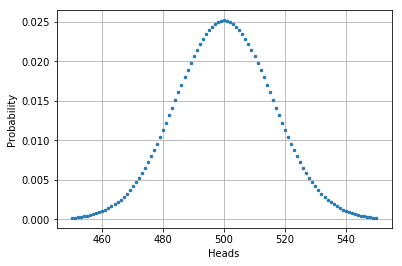

In [41]:
plt.figure(2)
x =  np.arange(450,551) # Python chops off the last element, so 551 is not a part of the array
plt.plot(x,sp.binom.pmf(x, n, p),'o', ms=2.5)
plt.xlabel('Heads')
plt.ylabel('Probability')
plt.grid()
plt.show()

Histogram of 1,000,000 simulations overlay.

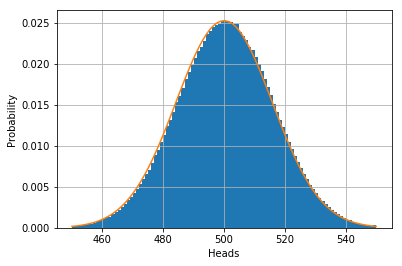

In [42]:
plt.figure(3)
plt.hist(a,density=True,bins=x)
plt.plot(x,sp.binom.pmf(x, n, p))
plt.xlabel('Heads')
plt.ylabel('Probability')
plt.grid()
plt.show()

The concept of cumulative distribution function: F(x) = P(X <= x). For Bin(1000,1/2), k=500:

In [140]:
np.sum(a==500)/simulations

0.025145

In [82]:
k=500
sp.binom.cdf(k,n,p)

0.5126125090888417

Make the plot.

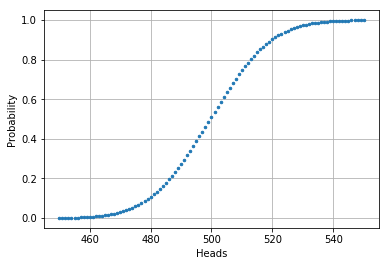

In [43]:
plt.figure(3)
plt.plot(x,sp.binom.cdf(x, n, p),'o', ms=2.5)
plt.xlabel('Heads')
plt.ylabel('Probability')
plt.grid()
plt.show()

A cut between "likely" and "unlikely" values of the random variable X. This corresponds to finding a value "Q" such that P(X<=Q) is small. Let us try some values between [460, 480]?

In [109]:
test_vals = np.arange(460,481)
sp.binom.cdf(test_vals, n, p)

array([0.00622207, 0.00742625, 0.00883112, 0.01046356, 0.01235282,
       0.01453056, 0.01703075, 0.01988964, 0.0231456 , 0.02683892,
       0.0310116 , 0.03570696, 0.04096935, 0.04684365, 0.05337477,
       0.06060713, 0.068584  , 0.07734685, 0.08693466, 0.09738316,
       0.10872415])

In [110]:
k = 469
sp.binom.cdf(k, n, p)

0.02683892482251521

In [42]:
sp.binom.cdf(474, 1000, 0.5)

0.05337477101717686

Suppose you are given the value of probability alpha such that
F(Q(alpha))=P(X<=Q(alpha)) <= alpha.
Then Q(alpha) = F^(-1)(alpha)
is called quantile. The quantile is computed using .ppf in scipy.

In [111]:
alpha = 0.025
sp.binom.ppf(alpha,n,p)

469.0

In [112]:
alpha = 0.05
sp.binom.ppf(alpha,n,p)

474.0

Median = 50% Quantile

In [113]:
alpha = 0.5
sp.binom.ppf(alpha,n,p)

500.0

The unlikely region is also on the right side of the distribution, that corresponds to high alphas.

In [114]:
alpha = 0.95
sp.binom.ppf(alpha,n,p)

526.0

In [54]:
alpha = 0.975
sp.binom.ppf(alpha,n,p)

531.0

95% confidence interval

In [56]:
alpha = 0.95
print(sp.binom.interval(alpha, n, p))

(469.0, 531.0)


Other statistics: mean, variance.

In [116]:
sp.binom.mean(n,p)

500.0

In [115]:
sp.binom.var(n,p)

250.0